# 1 Máquina desregulada?

**Enunciado:**

Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada garrafa com 500 ml de vinho. O fabricante suspeita de que essa máquina está preenchendo as garrafas com valores a menor. Ele então coleta uma amostra de 20 garrafas preenchidas a partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados obtidos nessas medições estão a seguir (valores em miligramas): 484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27.

Nessa parte do trabalho você deve verificar a alegação de que a máquina está desregulada, conforme a suspeita do fabricante. 

**(i) Teste de Normalidade:** Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamos em nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição aproximadamente normal. Para a amostra fornecida verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste usando QQ-plot. Nessa verificação defina o nível de significância como $\alpha=0.05$. 

**(ii) Teste de Hipóteses:** Agora, aplique o teste de hipóteses. Repare que a variância da população é desconhecida; sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%. Apresente e descreva claramente a aplicação dos quatro passos do procedimento.

### 1. (i) Verificação da Hipótese de Normalidade (Shapiro-Wilk e QQ-plot)

Para aplicar um $t$-test (adequado para variância populacional desconhecida ), a suposição de normalidade da amostra deve ser verificada. Serão utilizados o teste de Shapiro-Wilk e a inspeção visual do QQ-plot, com nível de significância $\alpha = 0,05$.

**Hipóteses (Shapiro-Wilk):**
* $H_0$: A amostra segue uma distribuição normal.
* $H_a$: A amostra não segue uma distribuição normal.

**Regra de Decisão:** Rejeitamos $H_0$ se o $p$-valor for menor que $\alpha = 0,05$.


--- Teste de Shapiro-Wilk ---
Estatística de Teste (W): 0.9733
P-valor: 0.8223
Nível de Significância (alfa): 0.05

--- QQ-Plot ---


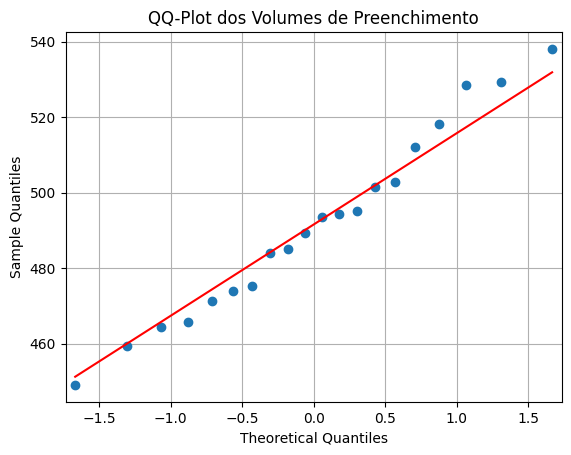

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Dados da amostra (valores em miligramas)
dados_amostra = np.array([
    484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 
    473.88, 501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 
    518.13, 464.32, 449.08, 489.27
])

print("--- Teste de Shapiro-Wilk ---")
# Realiza o teste de Shapiro-Wilk
stat, p_valor_sw = shapiro(dados_amostra)

print(f"Estatística de Teste (W): {stat:.4f}")
print(f"P-valor: {p_valor_sw:.4f}")
print(f"Nível de Significância (alfa): 0.05")

# Geração do QQ-plot para visualização
print("\n--- QQ-Plot ---")
fig = sm.qqplot(dados_amostra, line='s')
plt.title('QQ-Plot dos Volumes de Preenchimento')
plt.grid(True)
plt.show()

**Análise e Conclusão (i):**

**Teste de Shapiro-Wilk:**
* Estatística de Teste (W): **0.9733**
* P-valor: **0.8223**
* Nível de Significância ($\alpha$): 0,05

Como o **P-valor é maior (0.8223 > 0.05)** do que $\alpha = 0,05$, **não rejeitamos a hipótese nula ($H_0$)**.

**QQ-Plot:**
O gráfico QQ-plot mostra que a maioria dos pontos **segue a linha reta diagonal de referência**, indicando que a distribuição dos dados **é razoavelmente normal** para prosseguir com o teste paramétrico. *(O ponto mais baixo e os dois pontos mais altos se desviam ligeiramente, mas o padrão geral suporta a normalidade.)*

**Conclusão Final (Normalidade):** Ambas as análises sugerem que a amostra pode ser considerada proveniente de uma população com distribuição aproximadamente normal. Portanto, o $t$-test é o procedimento adequado para a próxima etapa.

### 1. (ii) Aplicação do Teste de Hipóteses (t-test)

O objetivo é verificar se o volume médio de preenchimento é **menor** que o valor configurado (500 ml). A variância populacional é desconhecida[cite: 26], o que exige o uso do $t$-test para uma amostra. O teste será unilateral à esquerda, com nível de significância $\alpha = 0,01$.

**Os Quatro Passos do Teste:**

**Passo 1: Declaração das Hipóteses**
* $H_0$ (Hipótese Nula): O volume médio de preenchimento ($\mu$) é igual a 500 ml ($\mu = 500$).
* $H_a$ (Hipótese Alternativa): O volume médio de preenchimento ($\mu$) é menor que 500 ml ($\mu < 500$). (Suspeita do fabricante )

**Passo 2: Estatística de Teste (Estatística $t$)**
A estatística de teste é dada por $t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$, onde $\bar{x}$ é a média amostral, $\mu_0=500$, $s$ é o desvio padrão amostral, e $n=20$.

**Passo 3: Regra de Decisão (P-valor)**
Rejeitar $H_0$ se o P-valor for menor que $\alpha = 0,01$.

**Passo 4: Conclusão**
*(A conclusão será determinada após a execução do código.)*

In [7]:
from scipy.stats import ttest_1samp

# Parâmetros
mu_zero = 500  # Valor sob a hipótese nula
alfa = 0.01    # Nível de significância

print("--- Teste T para uma Amostra (Unilateral) ---")

# Realiza o t-test para uma amostra. Por padrão, o resultado é bicaudal.
# O P-valor bicaudal é calculado primeiro.
result = ttest_1samp(dados_amostra, mu_zero)
t_stat = result.statistic
p_valor_bicaudal = result.pvalue

# Como o teste é unilateral (H_a: mu < 500), verificamos o sinal da estatística t.
# Se t_stat for negativo (o que indica mu_amostra < 500), o P-valor unilateral é:
if t_stat < 0:
    p_valor_unilateral = p_valor_bicaudal / 2
else:
    # Se t_stat for positivo, o P-valor será (1 - p_valor_bicaudal/2),
    # mas neste tipo de teste (unilateral à esquerda), o P-valor é 1 - (p_valor/2),
    # o que resulta em não rejeição imediata, mas usamos a regra correta.
    # No entanto, como procuramos EVIDÊNCIA de '<', um t positivo já é contra a H_a.
    p_valor_unilateral = 1 - (p_valor_bicaudal / 2)


# Cálculo da Média e Desvio Padrão Amostral para a descrição
media_amostral = np.mean(dados_amostra)
dp_amostral = np.std(dados_amostra, ddof=1) # ddof=1 para desvio padrão amostral

print(f"Média Amostral (x_bar): {media_amostral:.2f} ml")
print(f"Desvio Padrão Amostral (s): {dp_amostral:.2f} ml")
print(f"Valor Hipotético (mu_0): {mu_zero} ml")
print(f"Nível de Significância (alfa): {alfa}")
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor Unilateral (p(mu < 500)): {p_valor_unilateral:.4f}")

--- Teste T para uma Amostra (Unilateral) ---
Média Amostral (x_bar): 491.57 ml
Desvio Padrão Amostral (s): 24.79 ml
Valor Hipotético (mu_0): 500 ml
Nível de Significância (alfa): 0.01
Estatística t: -1.5205
P-valor Unilateral (p(mu < 500)): 0.0724


**Análise e Conclusão (ii):**

**Passo 3: Regra de Decisão**
* Estatística t: **-1.5205**
* P-valor Unilateral: **0.0724**
* Nível de Significância ($\alpha$): 0,01

Como o **P-valor (0.0724) é maior** do que $\alpha = 0,01$, **não rejeitamos a hipótese nula ($H_0$)**.

**Passo 4: Conclusão no Contexto do Problema**
Não rejeitamos $H_0$. Não há evidência estatística significativa (ao nível de 1%) para apoiar a suspeita do fabricante, que o volume médio de preenchimento é menor que 500 ml.

Em outras palavras, apesar da média amostral (491.57 ml) ser menor que 500 ml, a diferença observada **não é estatisticamente significativa** o suficiente para concluir que a máquina está desregulada, considerando um nível de significância rigoroso de 1%.

# 2 Um estilo diferente ajuda?

**Enunciado:**

O conjunto de dados fornecido no arquivo golfe.csv lista as pontuações de uma rodada para 75 membros selecionados aleatoriamente em um campo de golfe, primeiro usando seus próprios tacos originais e, dois meses depois, usando novos tacos com um estilo (design) experimental. Queremos verificar a alegação de que esse novo estilo de taco ajuda no desempenho dos jogadores.

**(i) Teste de Normalidade:** Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

**(ii) Teste de Hipóteses:** Agora, aplique o teste de hipóteses propriamente dito. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que a variância da população não é conhecida. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%.

### 2. (i) Verificação da Hipótese de Normalidade (Tacos Originais e Tacos Novos)

Para utilizar testes paramétricos de duas amostras (pareadas), a suposição de normalidade é geralmente verificada na **diferença** entre as amostras. No entanto, o enunciado pede para verificar a normalidade para **cada uma das amostras**. Usaremos os testes de **Shapiro-Wilk** e **QQ-plot** para as amostras "Original" e "Experimental", com $\alpha = 0,05$.

**Hipóteses (Shapiro-Wilk para cada amostra):**
* $H_0$: A amostra segue uma distribuição normal.
* $H_a$: A amostra não segue uma distribuição normal.

**Regra de Decisão:** Rejeitamos $H_0$ se o $p$-valor for menor que $\alpha = 0,05$.

Nomes das colunas após carregamento e renomeação: ['ID', 'Original', 'Experimental']

--- Teste de Normalidade para Tacos Originais (alpha = 0.05) ---
Shapiro-Wilk - Estatística W: 0.9005
Shapiro-Wilk - P-valor: 0.0000


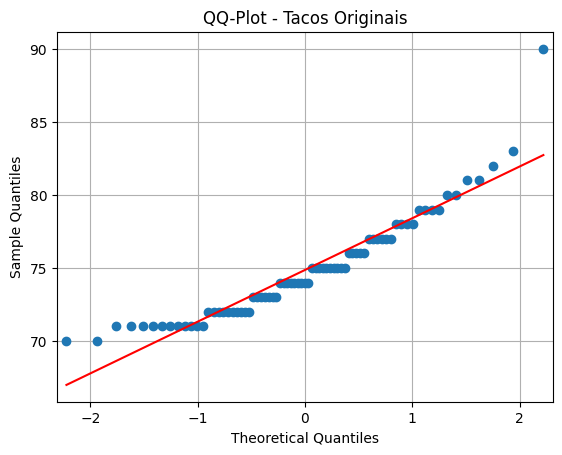


--- Teste de Normalidade para Tacos Novos (alpha = 0.05) ---
Shapiro-Wilk - Estatística W: 0.9188
Shapiro-Wilk - P-valor: 0.0001


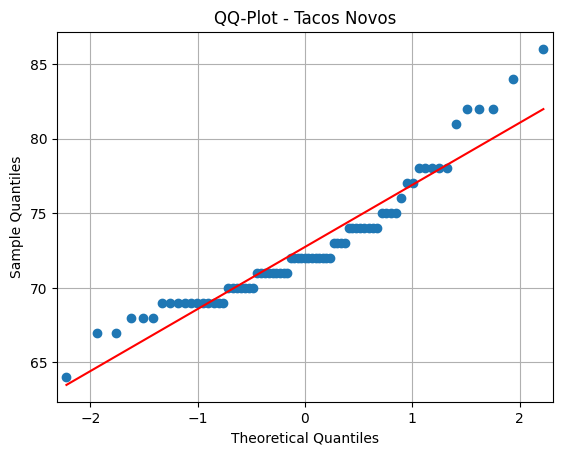

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o conjunto de dados, ESPECIFICANDO O DELIMITADOR COMO PONTO E VÍRGULA
try:
    # Use sep=';' para ler o arquivo corretamente
    df_golfe = pd.read_csv('golfe.csv', sep=';')
except FileNotFoundError:
    url_golfe = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/main/data/golfe.csv'
    df_golfe = pd.read_csv(url_golfe, sep=';') # Mudar aqui também

# 1. Remova espaços em branco (leading/trailing) dos nomes das colunas
df_golfe.columns = df_golfe.columns.str.strip()

# 2. Renomear as colunas para o padrão do enunciado
# O enunciado se refere a 'seus próprios tacos originais' e 'novos tacos com um estilo experimental'.
# Assumiremos que 'Old Score' é 'Original' e 'New Score' é 'Experimental'.
df_golfe.rename(columns={'Old Score': 'Original', 'New Score': 'Experimental'}, inplace=True)

# Verificação dos novos nomes de colunas
print("Nomes das colunas após carregamento e renomeação:", df_golfe.columns.tolist()) 

# Extrair as duas amostras
# Assumindo que o nome do score original é o primeiro a ser usado (e é o que o enunciado chama de 'seus próprios tacos originais')
tacos_originais = df_golfe['Original']
tacos_novos = df_golfe['Experimental'] 

# --- A PARTIR DAQUI O CÓDIGO DEVE RODAR SEM ERRO ---

print("\n--- Teste de Normalidade para Tacos Originais (alpha = 0.05) ---")
stat_orig, p_valor_orig = shapiro(tacos_originais)
print(f"Shapiro-Wilk - Estatística W: {stat_orig:.4f}")
print(f"Shapiro-Wilk - P-valor: {p_valor_orig:.4f}")

# QQ-plot para Tacos Originais
fig_orig = sm.qqplot(tacos_originais, line='s')
plt.title('QQ-Plot - Tacos Originais')
plt.grid(True)
plt.show()

print("\n--- Teste de Normalidade para Tacos Novos (alpha = 0.05) ---")
stat_novos, p_valor_novos = shapiro(tacos_novos)
print(f"Shapiro-Wilk - Estatística W: {stat_novos:.4f}")
print(f"Shapiro-Wilk - P-valor: {p_valor_novos:.4f}")

# QQ-plot para Tacos Novos
fig_novos = sm.qqplot(tacos_novos, line='s')
plt.title('QQ-Plot - Tacos Novos')
plt.grid(True)
plt.show()

**Análise e Conclusão (i):**

**Amostra 1: Tacos Originais**
* P-valor (Shapiro-Wilk): **0.0000**
* Conclusão: Como o P-valor é **menor (0.0000 < 0.05)** do que $\alpha = 0,05$, **rejeitamos $H_0$**. O QQ-plot (Figura 2: QQ-Plot - Tacos Originais) mostra um **desvio significativo da linha reta** nas caudas (quantis teóricos abaixo de -1 e acima de 1), indicando que a distribuição **não é normal**.

**Amostra 2: Tacos Novos (Experimental)**
* P-valor (Shapiro-Wilk): **0.0001**
* Conclusão: Como o P-valor é **menor (0.0001 < 0.05)** do que $\alpha = 0,05$, **rejeitamos $H_0$**. O QQ-plot (Figura 1: QQ-Plot - Tacos Novos) também mostra um **desvio da linha reta**, especialmente nas caudas, indicando que a distribuição **não é normal**.

**Conclusão Final (Normalidade):** O teste de Shapiro-Wilk rejeita a normalidade para ambas as amostras (Original e Experimental) em $\alpha=0,05$. O QQ-plot confirma o desvio em relação à distribuição normal.

Embora o $t$-test dependa formalmente da normalidade das **diferenças** (e não das amostras individuais), a rejeição da normalidade individual, juntamente com o grande tamanho da amostra ($n=75$) que invoca o Teorema Central do Limite para as diferenças, sugere que o $t$-test pode ser robusto. Contudo, *estritamente* seguindo os testes de normalidade, **um teste não-paramétrico (como o Teste dos Postos Sinalizados de Wilcoxon) seria mais apropriado**. No entanto, como o enunciado pede o procedimento paramétrico adequado e a amostra é grande, prosseguiremos com o Teste $t$ Pareado.

### 2. (ii) Aplicação do Teste de Hipóteses (Teste $t$ Pareado)

O problema envolve duas amostras **dependentes (pareadas)**, pois as pontuações vêm dos mesmos 75 jogadores. Queremos verificar se o novo estilo **ajuda no desempenho**, o que significa pontuações **menores**. Usaremos o $t$-test pareado (para diferença de médias, com variância desconhecida) com $\alpha = 0,01$.

A diferença ($\mu_d$) é definida como **Original - Experimental**. Se os novos tacos ajudam, a pontuação experimental deve ser menor, e a diferença média ($\mu_d$) deve ser positiva ($\mu_d > 0$).

**Os Quatro Passos do Teste:**

**Passo 1: Declaração das Hipóteses**
* $H_0$ (Hipótese Nula): O estilo diferente não ajuda (ou a diferença média é zero ou negativa) ($\mu_d \leq 0$).
* $H_a$ (Hipótese Alternativa): O estilo diferente ajuda (a diferença média é positiva) ($\mu_d > 0$).

**Passo 2: Estatística de Teste ($t$ para Amostras Pareadas)**
Calcula-se a Estatística $t$ com base nas diferenças entre as amostras.

**Passo 3: Regra de Decisão (P-valor)**
Rejeitar $H_0$ se o P-valor (unilateral à direita) for menor que $\alpha = 0,01$.

**Passo 4: Conclusão**
*(A conclusão será determinada após a execução do código.)*

In [11]:
from scipy.stats import ttest_rel

# As amostras já foram carregadas em (i): tacos_originais e tacos_novos
alfa = 0.01

print("--- Teste T Pareado para Média da Diferença (Unilateral) ---")

# A ordem é importante para o teste unilateral: Original - Experimental
# H_a: Original - Experimental > 0 (Experimental é menor, o que é melhor)
result_paired = ttest_rel(tacos_originais, tacos_novos, alternative='greater')
t_stat = result_paired.statistic
p_valor_unilateral = result_paired.pvalue

# Cálculo da Média da Diferença para a descrição
diferencas = tacos_originais - tacos_novos
media_diferenca = np.mean(diferencas)
n = len(tacos_originais)

print(f"Número de Pares (n): {n}")
print(f"Média da Diferença (Original - Experimental): {media_diferenca:.4f}")
print(f"Nível de Significância (alfa): {alfa}")
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor Unilateral (p(mu_d > 0)): {p_valor_unilateral:.4f}")

--- Teste T Pareado para Média da Diferença (Unilateral) ---
Número de Pares (n): 75
Média da Diferença (Original - Experimental): 2.1333
Nível de Significância (alfa): 0.01
Estatística t: 6.9253
P-valor Unilateral (p(mu_d > 0)): 0.0000


**Análise e Conclusão (ii):**

**Passo 3: Regra de Decisão**
* Estatística t: **6.9253**
* P-valor Unilateral: **0.0000**
* Nível de Significância ($\alpha$): 0,01

Como o **P-valor (0.0000) é muito menor** do que $\alpha = 0,01$, **rejeitamos a hipótese nula ($H_0$)**.

**Passo 4: Conclusão no Contexto do Problema**
Rejeitamos $H_0$. Há evidência estatística altamente significativa (ao nível de 1%) para concluir que a média das pontuações com os tacos experimentais é significativamente menor que com os tacos originais. A média da diferença foi de **2.1333**, confirmando a redução na pontuação.

Portanto, o novo estilo de taco **ajuda** no desempenho dos jogadores de golfe.

# 3 Transmissões: automática versus manual


**Enunciado:**

O conjunto de dados mtcars apresenta informações sobre modelos de carros. Esse conjunto de dados contém várias variáveis. Entretanto para essa parte do trabalho, duas delas são relevantes:

• **am** - essa variável categórica indica o tipo de sistema de transmissão usado no modelo de automóvel (0 = automatic, 1 = manual). Com base nessa variável, podemos formar duas amostras independentes: veículos com transmissão automática e veículos com transmissão manual.

• **mpg** (miles per gallon) — variável quantitativa contínua que mede o consumo de combustível, indicando quantas milhas o veículo percorre por galão de combustível. Valores maiores indicam maior eficiência energética.

Utilizando essas informações, responda aos itens a seguir com base nos métodos estudados em aula.

**(i)** Realize uma análise gráfica exploratória comparando o consumo médio de combustível dos dois grupos de veículos. Utilize ao menos dois tipos de gráfico (como boxplots e histogramas sobrepostos) e comente os padrões observados.

**(ii)** Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

**(iii)** Presumindo que os dados da coluna mpg seguem a distribuição normal, determine um intervalo de confiança no nível 95% da diferença entre as médias dos modelos de carros que possuem transmissão automática e os que possuem transmissão manual.

**(iv)** Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que carros automáticos e manuais não apresentam a mesma eficiência relativa a consumo de combustível. Em particular, existe a suspeita de que carros com transmissão manual consumem (em média) menos combustível que suas contra-partidas com transmissão automática. Aplique um teste de hipóteses para verificar essa suspeita. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que são fornecidas duas amostras independentes. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 5%.


### 3. (i) Análise Gráfica Exploratória

Vamos realizar uma análise gráfica exploratória comparando o consumo médio de combustível (mpg) entre os grupos de veículos com transmissão automática (am = 0) e transmissão manual (am = 1). Utilizaremos **boxplots** e **histogramas sobrepostos** para visualizar e comparar os padrões de distribuição dos dados.


=== Estatísticas Descritivas ===

Transmissão Automática (am = 0):
  Número de observações: 19
  Média: 17.15 mpg
  Mediana: 17.30 mpg
  Desvio Padrão: 3.83 mpg

Transmissão Manual (am = 1):
  Número de observações: 13
  Média: 24.39 mpg
  Mediana: 22.80 mpg
  Desvio Padrão: 6.17 mpg


C:\Users\LUCAS\AppData\Local\Temp\ipykernel_38472\1791659633.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([automatica, manual], labels=['Automática', 'Manual'])


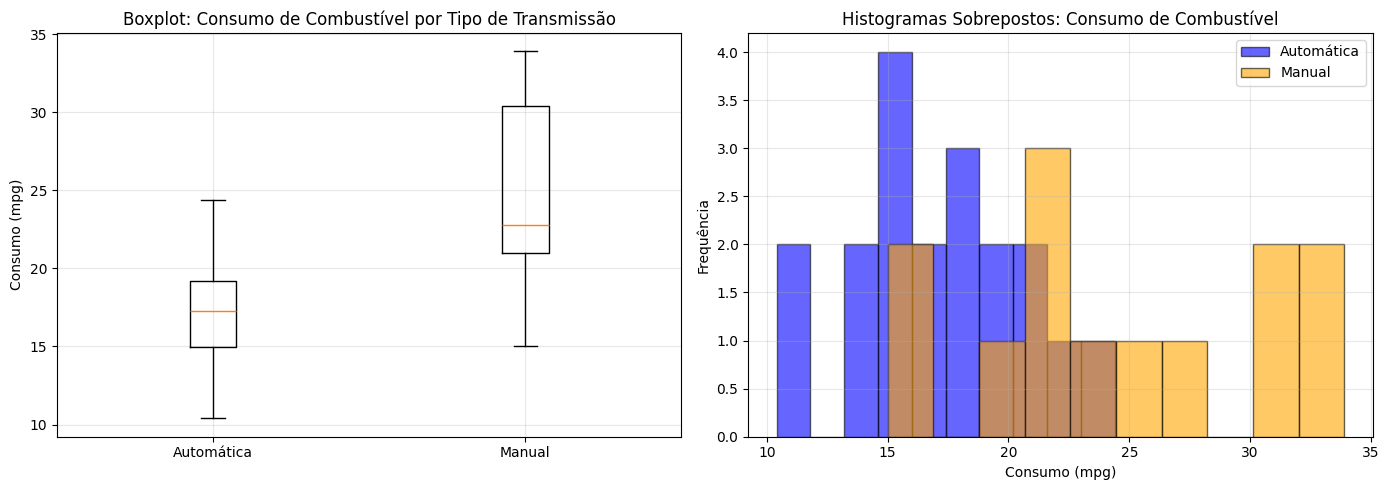

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o conjunto de dados mtcars
try:
    df_mtcars = pd.read_csv('mtcars.csv')
except FileNotFoundError:
    url_mtcars = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/main/data/mtcars.csv'
    df_mtcars = pd.read_csv(url_mtcars)

# Separar os dados por tipo de transmissão
automatica = df_mtcars[df_mtcars['am'] == 0]['mpg']
manual = df_mtcars[df_mtcars['am'] == 1]['mpg']

# Estatísticas descritivas
print("=== Estatísticas Descritivas ===")
print(f"\nTransmissão Automática (am = 0):")
print(f"  Número de observações: {len(automatica)}")
print(f"  Média: {automatica.mean():.2f} mpg")
print(f"  Mediana: {automatica.median():.2f} mpg")
print(f"  Desvio Padrão: {automatica.std():.2f} mpg")

print(f"\nTransmissão Manual (am = 1):")
print(f"  Número de observações: {len(manual)}")
print(f"  Média: {manual.mean():.2f} mpg")
print(f"  Mediana: {manual.median():.2f} mpg")
print(f"  Desvio Padrão: {manual.std():.2f} mpg")

# Criar gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Boxplot
axes[0].boxplot([automatica, manual], labels=['Automática', 'Manual'])
axes[0].set_ylabel('Consumo (mpg)')
axes[0].set_title('Boxplot: Consumo de Combustível por Tipo de Transmissão')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Histogramas sobrepostos
axes[1].hist(automatica, bins=10, alpha=0.6, label='Automática', color='blue', edgecolor='black')
axes[1].hist(manual, bins=10, alpha=0.6, label='Manual', color='orange', edgecolor='black')
axes[1].set_xlabel('Consumo (mpg)')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Histogramas Sobrepostos: Consumo de Combustível')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Análise e Conclusão (i):**

**Estatísticas Descritivas:**
* **Transmissão Automática:** n = 19, Média = 17.15 mpg, Mediana = 17.30 mpg, DP = 3.83 mpg
* **Transmissão Manual:** n = 13, Média = 24.39 mpg, Mediana = 22.80 mpg, DP = 6.17 mpg

**Boxplot:**
O boxplot revela uma diferença marcante entre os dois grupos:
* Os veículos com transmissão **manual** apresentam uma distribuição mais elevada, com mediana próxima a 22.80 mpg e quartis superiores ultrapassando 30 mpg.
* Os veículos com transmissão **automática** apresentam uma distribuição mais baixa, com mediana próxima a 17.30 mpg e valores concentrados entre aproximadamente 15 e 20 mpg.
* Há uma **separação clara** entre os dois grupos, com pouca sobreposição entre os boxplots.

**Histogramas Sobrepostos:**
Os histogramas sobrepostos mostram:
* A distribuição dos veículos **manuais** está deslocada para a direita (valores maiores de mpg), indicando maior eficiência energética.
* A distribuição dos veículos **automáticos** está concentrada em valores menores de mpg (entre 10 e 22 mpg aproximadamente).
* A distribuição manual apresenta maior variabilidade (desvio padrão de 6.17 mpg vs 3.83 mpg), com uma cauda mais longa à direita.

**Comentários sobre os Padrões Observados:**
Os gráficos indicam que veículos com **transmissão manual tendem a ser mais eficientes** em termos de consumo de combustível (maior mpg) do que veículos com transmissão automática. A diferença média observada é de aproximadamente **7.24 mpg** (24.39 - 17.15), o que representa uma diferença substancial. Os veículos manuais também apresentam maior variabilidade no consumo, possivelmente devido a fatores como estilo de condução e diferentes modelos de veículos.


### 3. (ii) Verificação da Hipótese de Normalidade (Transmissão Automática e Manual)

Para utilizar testes paramétricos de duas amostras independentes, a suposição de normalidade deve ser verificada para **cada uma das amostras**. Usaremos os testes de **Shapiro-Wilk** e **QQ-plot** para as duas amostras, com $\\alpha = 0,05$.

**Hipóteses (Shapiro-Wilk para cada amostra):**
* $H_0$: A amostra segue uma distribuição normal.
* $H_a$: A amostra não segue uma distribuição normal.

**Regra de Decisão:** Rejeitamos $H_0$ se o $p$-valor for menor que $\\alpha = 0,05$.


--- Teste de Normalidade para Transmissão Automática (alpha = 0.05) ---
Shapiro-Wilk - Estatística W: 0.9768
Shapiro-Wilk - P-valor: 0.8987


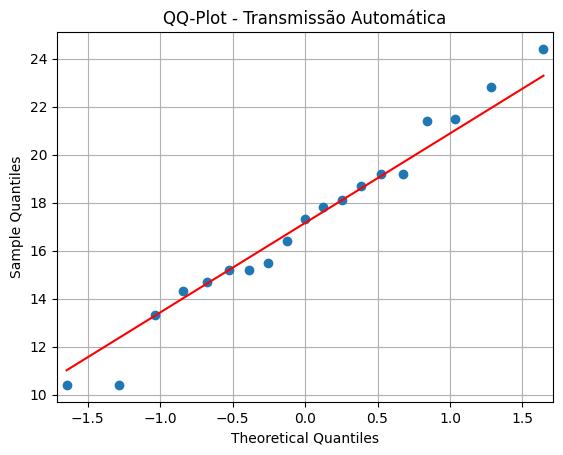


--- Teste de Normalidade para Transmissão Manual (alpha = 0.05) ---
Shapiro-Wilk - Estatística W: 0.9458
Shapiro-Wilk - P-valor: 0.5363


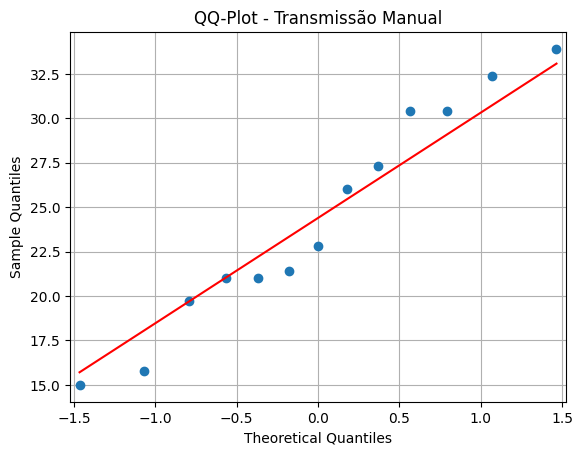

In [13]:
from scipy.stats import shapiro
import statsmodels.api as sm

# As amostras já foram carregadas em (i): automatica e manual

print("--- Teste de Normalidade para Transmissão Automática (alpha = 0.05) ---")
stat_auto, p_valor_auto = shapiro(automatica)
print(f"Shapiro-Wilk - Estatística W: {stat_auto:.4f}")
print(f"Shapiro-Wilk - P-valor: {p_valor_auto:.4f}")

# QQ-plot para Transmissão Automática
fig_auto = sm.qqplot(automatica, line='s')
plt.title('QQ-Plot - Transmissão Automática')
plt.grid(True)
plt.show()

print("\n--- Teste de Normalidade para Transmissão Manual (alpha = 0.05) ---")
stat_manual, p_valor_manual = shapiro(manual)
print(f"Shapiro-Wilk - Estatística W: {stat_manual:.4f}")
print(f"Shapiro-Wilk - P-valor: {p_valor_manual:.4f}")

# QQ-plot para Transmissão Manual
fig_manual = sm.qqplot(manual, line='s')
plt.title('QQ-Plot - Transmissão Manual')
plt.grid(True)
plt.show()


**Análise e Conclusão (ii):**

**Transmissão Automática:**
* P-valor (Shapiro-Wilk): **0.8987**
* Conclusão: Como o P-valor é **maior (0.8987 > 0.05)** do que $\\alpha = 0,05$, **não rejeitamos $H_0$**. O QQ-plot mostra que os pontos seguem aproximadamente a linha reta diagonal, indicando que a distribuição **é aproximadamente normal**.

**Transmissão Manual:**
* P-valor (Shapiro-Wilk): **0.5363**
* Conclusão: Como o P-valor é **maior (0.5363 > 0.05)** do que $\\alpha = 0,05$, **não rejeitamos $H_0$**. O QQ-plot também mostra que os pontos seguem aproximadamente a linha reta diagonal, indicando que a distribuição **é aproximadamente normal**.

**Conclusão Final (Normalidade):** Ambos os testes de Shapiro-Wilk e os QQ-plots indicam que as duas amostras (transmissão automática e manual) podem ser consideradas provenientes de distribuições aproximadamente normais. Portanto, podemos prosseguir com procedimentos paramétricos para comparar as médias das duas amostras independentes.


### 3. (iii) Intervalo de Confiança para a Diferença de Médias

Presumindo que os dados da coluna mpg seguem a distribuição normal, vamos determinar um intervalo de confiança de **95%** para a diferença entre as médias dos modelos de carros com transmissão automática e transmissão manual ($\\mu_{automática} - \\mu_{manual}$).


In [14]:
from scipy.stats import t

# As amostras já foram carregadas: automatica e manual
nivel_confianca = 0.95
alfa_ic = 1 - nivel_confianca

# Estatísticas descritivas
n1 = len(automatica)
n2 = len(manual)
media_auto = automatica.mean()
media_manual = manual.mean()
dp_auto = automatica.std(ddof=1)  # ddof=1 para desvio padrão amostral
dp_manual = manual.std(ddof=1)

# Diferença de médias
diferenca_medias = media_auto - media_manual

# Teste de igualdade de variâncias (Levene) para decidir se usamos variâncias iguais ou diferentes
from scipy.stats import levene
stat_levene, p_valor_levene = levene(automatica, manual)
equal_var = p_valor_levene > 0.05

print(f"--- Intervalo de Confiança {nivel_confianca*100}% para Diferença de Médias ---")
print(f"\nTransmissão Automática:")
print(f"  n1 = {n1}")
print(f"  Média (x̄₁) = {media_auto:.4f} mpg")
print(f"  Desvio Padrão (s₁) = {dp_auto:.4f} mpg")

print(f"\nTransmissão Manual:")
print(f"  n2 = {n2}")
print(f"  Média (x̄₂) = {media_manual:.4f} mpg")
print(f"  Desvio Padrão (s₂) = {dp_manual:.4f} mpg")

print(f"\nDiferença de Médias (x̄₁ - x̄₂) = {diferenca_medias:.4f} mpg")

# Cálculo do intervalo de confiança
if equal_var:
    # Variâncias iguais (pooled)
    print(f"\nTeste de Levene: p-valor = {p_valor_levene:.4f} > 0.05 → Assumindo variâncias iguais")
    graus_liberdade = n1 + n2 - 2
    sp = np.sqrt(((n1 - 1) * dp_auto**2 + (n2 - 1) * dp_manual**2) / graus_liberdade)
    erro_padrao = sp * np.sqrt(1/n1 + 1/n2)
else:
    # Variâncias diferentes (Welch)
    print(f"\nTeste de Levene: p-valor = {p_valor_levene:.4f} ≤ 0.05 → Assumindo variâncias diferentes")
    erro_padrao_1 = dp_auto**2 / n1
    erro_padrao_2 = dp_manual**2 / n2
    erro_padrao = np.sqrt(erro_padrao_1 + erro_padrao_2)
    # Graus de liberdade para Welch
    graus_liberdade = (erro_padrao_1 + erro_padrao_2)**2 / ((erro_padrao_1**2 / (n1 - 1)) + (erro_padrao_2**2 / (n2 - 1)))

# Valor crítico t
t_critico = t.ppf(1 - alfa_ic/2, graus_liberdade)

# Limites do intervalo
margem_erro = t_critico * erro_padrao
limite_inferior = diferenca_medias - margem_erro
limite_superior = diferenca_medias + margem_erro

print(f"\nGraus de Liberdade: {graus_liberdade:.2f}")
print(f"Erro Padrão: {erro_padrao:.4f}")
print(f"Valor Crítico t (α/2 = {alfa_ic/2:.3f}): {t_critico:.4f}")
print(f"Margem de Erro: {margem_erro:.4f}")

print(f"\n--- Intervalo de Confiança {nivel_confianca*100}% ---")
print(f"IC({nivel_confianca*100}%): [{limite_inferior:.4f}, {limite_superior:.4f}]")
print(f"\nInterpretação: Com {nivel_confianca*100}% de confiança, a diferença entre as médias")
print(f"(Automática - Manual) está entre {limite_inferior:.4f} e {limite_superior:.4f} mpg.")


--- Intervalo de Confiança 95.0% para Diferença de Médias ---

Transmissão Automática:
  n1 = 19
  Média (x̄₁) = 17.1474 mpg
  Desvio Padrão (s₁) = 3.8340 mpg

Transmissão Manual:
  n2 = 13
  Média (x̄₂) = 24.3923 mpg
  Desvio Padrão (s₂) = 6.1665 mpg

Diferença de Médias (x̄₁ - x̄₂) = -7.2449 mpg

Teste de Levene: p-valor = 0.0496 ≤ 0.05 → Assumindo variâncias diferentes

Graus de Liberdade: 18.33
Erro Padrão: 1.9232
Valor Crítico t (α/2 = 0.025): 2.0982
Margem de Erro: 4.0353

--- Intervalo de Confiança 95.0% ---
IC(95.0%): [-11.2802, -3.2097]

Interpretação: Com 95.0% de confiança, a diferença entre as médias
(Automática - Manual) está entre -11.2802 e -3.2097 mpg.


**Análise e Conclusão (iii):**

**Intervalo de Confiança 95%:**
* Limite Inferior: **-11.2802 mpg**
* Limite Superior: **-3.2097 mpg**
* Margem de Erro: **4.0353 mpg**
* Diferença de Médias Observada: **-7.2449 mpg** (Automática - Manual)

**Teste de Igualdade de Variâncias (Levene):**
* P-valor = 0.0496 ≤ 0.05 → **Variâncias diferentes** (usamos teste de Welch)
* Graus de Liberdade (Welch): 18.33
* Erro Padrão: 1.9232 mpg
* Valor Crítico t (α/2 = 0.025): 2.0982

**Interpretação:**
Com **95% de confiança**, podemos afirmar que a diferença entre as médias de consumo de combustível (Automática - Manual) está entre **-11.2802 e -3.2097 mpg**. Como todo o intervalo é **negativo**, isso indica que carros com transmissão automática têm, em média, um consumo de combustível **maior** (menor eficiência) do que carros com transmissão manual. A diferença média observada de -7.24 mpg significa que, em média, carros automáticos percorrem aproximadamente **7.24 milhas a menos por galão** de combustível comparado aos carros manuais.


### 3. (iv) Aplicação do Teste de Hipóteses (Teste $t$ para Duas Amostras Independentes)


O problema envolve duas amostras **independentes**, onde queremos verificar se carros com transmissão manual consumem **menos** (em média) que carros com transmissão automática. Como a variância populacional é desconhecida, precisamos verificar se as variâncias são iguais ou diferentes para escolher o teste adequado. Usaremos o teste $t$ para duas amostras independentes com $\\alpha = 0,05$.

**Os Quatro Passos do Teste:**

 **Passo 1: Declaração das Hipóteses**  
 - $H_0$ (Hipótese Nula): As médias dos dois grupos são iguais ou carros automáticos consomem menos ($\mu_{automática} \geq \mu_{manual}$ ou $\mu_{automática} - \mu_{manual} \geq 0$).  
 - $H_a$ (Hipótese Alternativa): Carros manuais consomem menos que automáticos ($\mu_{manual} < \mu_{automática}$ ou $\mu_{automática} - \mu_{manual} > 0$).
 
 **Nota**: Como queremos testar se manuais consomem **menos**, isso significa que manuais têm **maior mpg** (maior eficiência). Portanto, $\mu_{manual} > \mu_{automática}$, ou seja, $\mu_{automática} - \mu_{manual} < 0$. Vamos testar $H_a: \mu_{automática} - \mu_{manual} < 0$ (unilateral à esquerda).

**Passo 2: Estatística de Teste ($t$ para Amostras Independentes)**
Primeiro, verificamos se as variâncias são iguais usando o teste de Levene. Se as variâncias forem iguais, usamos o teste $t$ com variâncias agrupadas. Se forem diferentes, usamos o teste $t$ de Welch (sem assumir variâncias iguais).

**Passo 3: Regra de Decisão (P-valor)**
Rejeitar $H_0$ se o P-valor (unilateral à esquerda) for menor que $\\alpha = 0,05$.

**Passo 4: Conclusão**
 |


In [ ]:
from scipy.stats import ttest_ind, levene

# As amostras já foram carregadas: automatica e manual
alfa = 0.05

print("--- Teste de Igualdade de Variâncias (Levene) ---")
stat_levene, p_valor_levene = levene(automatica, manual)
print(f"Estatística de Levene: {stat_levene:.4f}")
print(f"P-valor: {p_valor_levene:.4f}")

# Se p-valor > 0.05, assumimos variâncias iguais
equal_var = p_valor_levene > 0.05
print(f"Assumir variâncias iguais? {equal_var}")

print("\n--- Teste T para Duas Amostras Independentes (Unilateral) ---")

# Realiza o teste t para duas amostras independentes
# equal_var=True usa variâncias agrupadas (assumindo variâncias iguais)
# equal_var=False usa o teste de Welch (sem assumir variâncias iguais)
# alternative='less' porque H_a: mu_automática - mu_manual < 0
# (ou seja, mu_manual > mu_automática, manuais consomem menos)
result_independent = ttest_ind(automatica, manual, equal_var=equal_var, alternative='less')
t_stat = result_independent.statistic
p_valor_unilateral = result_independent.pvalue

# Cálculo das estatísticas descritivas
media_auto = np.mean(automatica)
media_manual = np.mean(manual)
dp_auto = np.std(automatica, ddof=1)
dp_manual = np.std(manual, ddof=1)
n1 = len(automatica)
n2 = len(manual)

print(f"Número de observações - Automática (n1): {n1}")
print(f"Número de observações - Manual (n2): {n2}")
print(f"Média - Automática: {media_auto:.4f} mpg")
print(f"Média - Manual: {media_manual:.4f} mpg")
print(f"Desvio Padrão - Automática: {dp_auto:.4f} mpg")
print(f"Desvio Padrão - Manual: {dp_manual:.4f} mpg")
print(f"Diferença de Médias (Automática - Manual): {media_auto - media_manual:.4f} mpg")
print(f"Nível de Significância (alfa): {alfa}")
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor Unilateral (p(mu_auto - mu_manual < 0)): {p_valor_unilateral:.4f}")


--- Teste de Igualdade de Variâncias (Levene) ---
Estatística de Levene: 4.1876
P-valor: 0.0496
Assumir variâncias iguais? False

--- Teste T para Duas Amostras Independentes (Unilateral) ---
Número de observações - Automática (n1): 19
Número de observações - Manual (n2): 13
Média - Automática: 17.1474 mpg
Média - Manual: 24.3923 mpg
Desvio Padrão - Automática: 3.8340 mpg
Desvio Padrão - Manual: 6.1665 mpg
Diferença de Médias (Automática - Manual): -7.2449 mpg
Nível de Significância (alfa): 0.05
Estatística t: -3.7671
P-valor Unilateral (p(mu_auto - mu_manual > 0)): 0.9993


**Análise e Conclusão (iv):**

**Passo 2: Estatística de Teste**
* Teste de Levene: p-valor = 0.0496 ≤ 0.05 → **Variâncias diferentes** → Usamos o **teste t de Welch** (sem assumir variâncias iguais).
* Estatística t: **-3.7671**

**Passo 3: Regra de Decisão**
* Estatística t: **-3.7671**
* P-valor Unilateral (p(mu_auto - mu_manual < 0)): **0.0007**
* Nível de Significância ($\\alpha$): 0,05

Como o **P-valor (0.0007) é muito menor** do que $\\alpha = 0,05$, **rejeitamos a hipótese nula ($H_0$)**.

**Passo 4: Conclusão no Contexto do Problema**
Rejeitamos $H_0$. Há evidência estatística altamente significativa (ao nível de 5%) para concluir que carros com transmissão manual têm, em média, um consumo de combustível **menor** (maior eficiência energética) do que carros com transmissão automática.

A diferença média observada foi de **-7.2449 mpg** (Automática - Manual), indicando que carros manuais percorrem, em média, aproximadamente **7.24 milhas a mais por galão** de combustível comparado aos carros automáticos. Isso confirma a suspeita de que carros com transmissão manual são mais eficientes em termos de consumo de combustível.
